Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7792 - loss: 0.6813 - val_accuracy: 0.9770 - val_loss: 0.0742
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9601 - loss: 0.1325 - val_accuracy: 0.9821 - val_loss: 0.0510
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9705 - loss: 0.0956 - val_accuracy: 0.9859 - val_loss: 0.0397
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9752 - loss: 0.0800 - val_accuracy: 0.9871 - val_loss: 0.0360
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9782 - loss: 0.0692 - val_accuracy: 0.9889 - val_loss: 0.0325
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9814 - loss: 0.0574 - val_accuracy: 0.9906 - val_loss: 0.0276
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9828 - loss: 0.0550 - val_accuracy: 0.9908 - val_loss: 0.0274
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9847 - loss: 0.0495 - val_

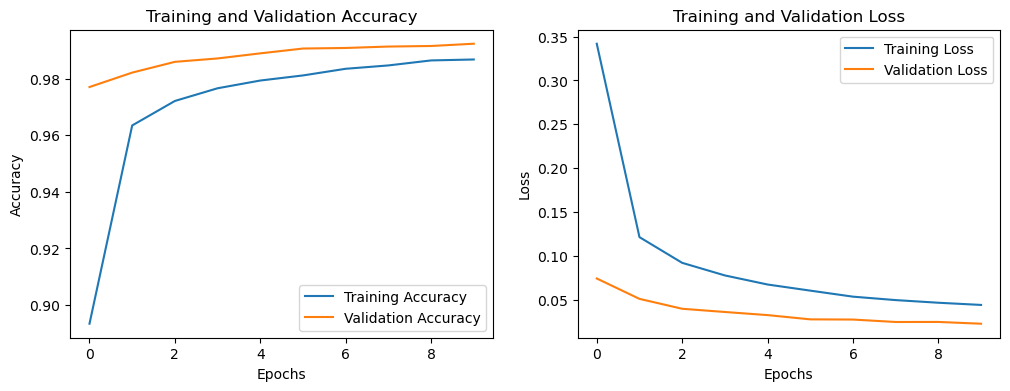

In [1]:
import keras
import numpy as np
import tensorflow as tf
from keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tkinter import *

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images to (28, 28, 1) for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Input(shape=(28, 28, 1)),  
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model for later use
model.save('cnn_mnist_model.keras')
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


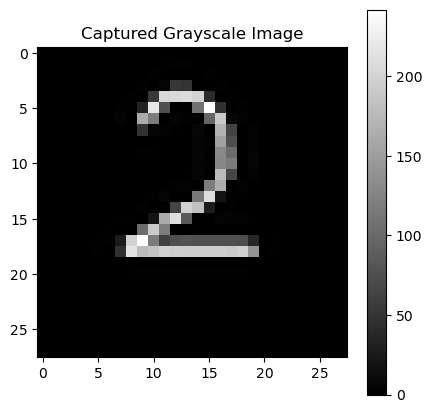

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


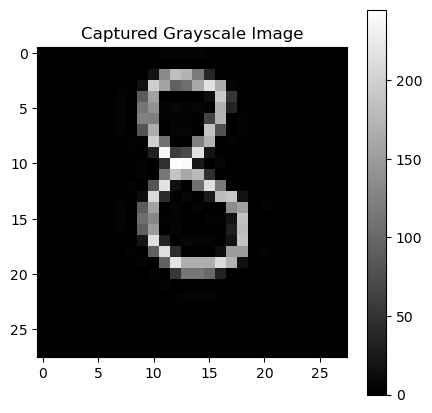

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


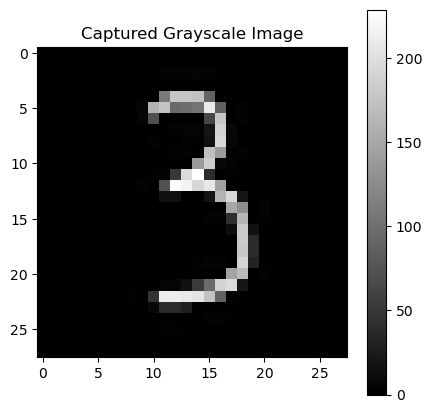

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


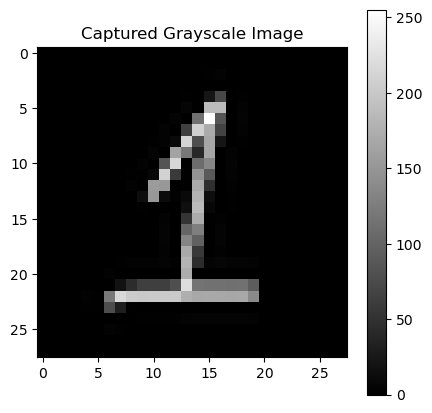

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


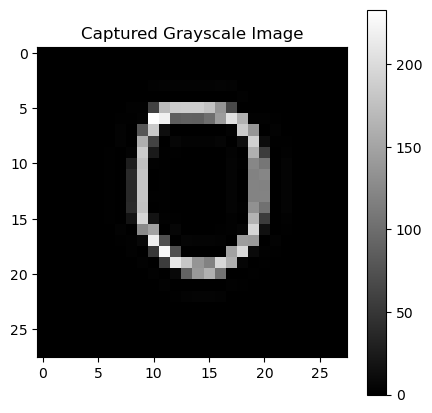

In [2]:
import tkinter as tk  
from tkinter import ttk
from keras.src.saving import load_model
# GUI for handwritten digit recognition
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt


model = load_model('cnn_mnist_model.keras')
window = Tk()
window.title("Handwritten Digit Recognition with CNN")
drawing_image = Image.new("L", (350, 290), "black")
draw = ImageDraw.Draw(drawing_image)
predictions = []
timestamps = []


def predict_digit():
    global drawing_image
    # Resize and preprocess the image
    img_resized = drawing_image.resize((28, 28), Image.Resampling.LANCZOS)
    img_array = np.asarray(img_resized).reshape(1, 28, 28, 1) / 255.0
    
    # Predict the digit
    prediction = model.predict(img_array)
    digit = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # Display result
    result_label.config(text=f"Predicted Digit: {digit}\nConfidence: {confidence:.2f}%")
    # Show the captured grayscale image
    show_grayscale_image(img_resized)
    
    show_accuracy_table(prediction)


def show_accuracy_table(prediction):
    # Create a new window for the table
    table_window = tk.Toplevel(window)
    table_window.title("Prediction Accuracy Table")
    
    # Create a treeview for the table
    tree = ttk.Treeview(table_window, columns=('Digit', 'Confidence'), show='headings')
    tree.heading('Digit', text='Digit')
    tree.heading('Confidence', text='Confidence (%)')
    tree.grid(row=0, column=0, padx=10, pady=10)
    
    # Populate the table with prediction probabilities
    for i, prob in enumerate(prediction.flatten()):
        tree.insert('', 'end', values=(i, f"{prob * 100:.2f}"))

    # Add a button to close the table
    close_button = Button(table_window, text="Close", command=table_window.destroy, bg="red", fg="white")
    close_button.grid(row=1, column=0, pady=10)
def show_grayscale_image(image):
    plt.figure(figsize=(5, 5))
    plt.title("Captured Grayscale Image")
    plt.imshow(np.asarray(image), cmap='gray')
    plt.colorbar()
    plt.show()
def clear_canvas():
    global drawing_image, draw
    cv.delete("all")
    drawing_image = Image.new("L", (350, 290), "black")
    draw = ImageDraw.Draw(drawing_image)

def activate_paint(event):
    global lastx, lasty
    lastx, lasty = event.x, event.y

def draw_lines(event):
    global lastx, lasty, draw
    x, y = event.x, event.y
    cv.create_line((lastx, lasty, x, y), width=10, fill='white', capstyle=ROUND, smooth=TRUE, splinesteps=12)
    draw.line((lastx, lasty, x, y), fill="white", width=10)
    lastx, lasty = x, y
    
# GUI layout
cv = Canvas(window, width=350, height=290, bg='black')
cv.grid(row=0, column=0, columnspan=2, padx=10, pady=10)
cv.bind('<Button-1>', activate_paint)
cv.bind('<B1-Motion>', draw_lines)

predict_button = Button(window, text="Predict", command=predict_digit, bg="green", fg="white")
predict_button.grid(row=1, column=0, pady=10)

clear_button = Button(window, text="Clear", command=clear_canvas, bg="red", fg="white")
clear_button.grid(row=1, column=1, pady=10)


result_label = Label(window, text="Draw a digit and click Predict!", font=('Helvetica', 14))
result_label.grid(row=2, column=0, columnspan=2, pady=10)

window.mainloop()